### Set the Project

In [1]:
PROJECT_ID = ""
if PROJECT_ID == "" or PROJECT_ID is None:
    PROJECT_ID = "wide-ratio-375614"  # @param {type:"string"}

PROJECT_ID

'wide-ratio-375614'

### Google Cloud Authentication

In [2]:
import os
import sys

# This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

# The Google Cloud Notebook product has specific requirements
IS_GOOGLE_CLOUD_NOTEBOOK = os.path.exists("/opt/deeplearning/metadata/env_version")

# If on Google Cloud Notebooks, then don't execute this code
if not IS_GOOGLE_CLOUD_NOTEBOOK:
    if "google.colab" in sys.modules:
        from google.colab import auth as google_auth

        google_auth.authenticate_user()

    # If you are running this notebook locally, replace the string below with the
    # path to your service account key and run this cell to authenticate your GCP
    # account.
    elif not os.getenv("IS_TESTING"):
        %env GOOGLE_APPLICATION_CREDENTIALS ''

In [3]:
# Importing some important libraries that will be used during the notebook
import numpy as np
import pandas as pd
import plotly.express as px
from google.cloud import bigquery

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Client manages connections to the BigQuery API and helps
#bundle configuration (project, credentials) needed for API requests.
client = bigquery.Client(PROJECT_ID)

# to make sure all columns are displayed while working with dataframe
pd.set_option('display.max_columns', None)

### Exploratory Data Analysis (EDA)

In [6]:
PROJECT_ID_DATA = "mh-hackathon"
DATASET_ID_DATA = "ga4_data" 
TABLE_ID_TRAIN  = "ga4_train"
TABLE_ID_TEST  = "ga4_test"
START_DATE = "20201101"
END_DATE = "20210131"

In [7]:
# let's check how the train data looks like
query = f"""
SELECT
  *
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
LIMIT 5
"""
query_job = client.query(query)
top5_data = query_job.to_dataframe()
top5_data.head()

,user_pseudo_id,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,privacy_info,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items,ltv
0,8594243.4562718268,20201121,1605972615267100,view_item,"[{'key': 'page_location', 'value': {'string_va...",<NA>,NaN,782266748,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1605971991634862,"{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Wester...",None,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[],70.052761
1,30900021.3233786964,20210108,1610080403881070,user_engagement,"[{'key': 'debug_mode', 'value': {'string_value...",<NA>,NaN,7456154266,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1602033447181464,"{'category': 'mobile', 'mobile_brand_name': '<...","{'continent': 'Asia', 'sub_continent': 'Wester...",None,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[],8.012165
2,2661490.8294165879,20201110,1605002723977128,page_view,"[{'key': 'page_title', 'value': {'string_value...",<NA>,NaN,316922447,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1605002723977128,"{'category': 'mobile', 'mobile_brand_name': '<...","{'continent': 'Asia', 'sub_continent': 'Wester...",None,"{'medium': '<Other>', 'name': '<Other>', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[],70.900515
3,52407464.0313773688,20201208,1607461234617356,scroll,"[{'key': 'session_engaged', 'value': {'string_...",<NA>,NaN,-7325297035,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1605035923000488,"{'category': 'mobile', 'mobile_brand_name': 'H...","{'continent': 'Asia', 'sub_continent': 'Wester...",None,"{'medium': 'referral', 'name': '(referral)', '...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[],0.779221
4,84123100.3290360033,20201108,1604864504346804,user_engagement,"[{'key': 'debug_mode', 'value': {'string_value...",<NA>,NaN,199154306,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1604864373827450,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Asia', 'sub_continent': 'Wester...",None,"{'medium': 'referral', 'name': '(referral)', '...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[],8.388783


In [8]:
# let's check how the test data looks like
query = f"""
SELECT
  *
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TEST}`
LIMIT 5
"""
query_job = client.query(query)
top5_data = query_job.to_dataframe()
top5_data.head()

,user_pseudo_id,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,privacy_info,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,1000823.8498711409,20210118,1610938668079160,page_view,"[{'key': 'session_engaged', 'value': {'string_...",<NA>,NaN,-9796371683,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1610938663062961,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'So...",None,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,1000823.8498711409,20210118,1610938740311812,user_engagement,"[{'key': 'page_title', 'value': {'string_value...",<NA>,NaN,-2370677642,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1610938663062961,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'So...",None,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,1000823.8498711409,20210118,1610938663062961,session_start,"[{'key': 'ga_session_number', 'value': {'strin...",<NA>,NaN,9869243676,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1610938663062961,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'So...",None,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,1000985.4712566084,20210114,1610603132099178,session_start,"[{'key': 'page_title', 'value': {'string_value...",<NA>,NaN,2236704977,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1610603132099178,"{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Americas', 'sub_continent': 'No...",None,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,1000985.4712566084,20210114,1610603132099178,page_view,"[{'key': 'engaged_session_event', 'value': {'s...",<NA>,NaN,2236704977,<NA>,None,"{'analytics_storage': None, 'ads_storage': Non...",[],1610603132099178,"{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Americas', 'sub_continent': 'No...",None,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [9]:
# check the column datatype
query = f"""
SELECT
  DISTINCT(column_name),
  data_type
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.INFORMATION_SCHEMA.COLUMNS`
"""

query_job = client.query(query)
predict_data = query_job.to_dataframe()
predict_data

,column_name,data_type
0,user_pseudo_id,STRING
1,event_date,STRING
2,event_timestamp,INT64
3,event_name,STRING
4,event_params,"ARRAY<STRUCT<key STRING, value STRUCT<string_v..."
5,event_previous_timestamp,INT64
6,event_value_in_usd,FLOAT64
7,event_bundle_sequence_id,INT64
8,event_server_timestamp_offset,INT64
9,user_id,STRING


In [10]:
# check the data for one user_pseudo_id
query = f"""

SELECT
  *
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
WHERE user_pseudo_id = '52407464.0313773688'
"""

print(query) # check in bq
query_job = client.query(query)
id_data = query_job.to_dataframe()




SELECT
  *
FROM
  `mh-hackathon.ga4_data.ga4_train`
WHERE user_pseudo_id = '52407464.0313773688'



In [11]:
id_data['event_date'].value_counts()
# one user has logged in different days

20201208    36
20201203    21
20201207    14
20201110     4
20201204     2
Name: event_date, dtype: int64

In [12]:
id_data['event_name'].value_counts()
# one user has different events

page_view            23
user_engagement      22
scroll               10
session_start         5
begin_checkout        4
view_item             4
view_promotion        3
add_shipping_info     2
first_visit           1
select_item           1
add_payment_info      1
purchase              1
Name: event_name, dtype: int64

In [13]:
# check the counts for train
query = f"""
SELECT
  COUNT(*) AS event_count,
  COUNT(DISTINCT user_pseudo_id) AS user_count,
  COUNT(DISTINCT event_date) AS day_count,
  COUNT(event_name) AS event_name_count,
  COUNT(user_id) AS registered_user_id_count,
  COUNT(event_value_in_usd) AS event_value_in_usd_count,
  COUNT(platform) AS platform_count,
  COUNT(DISTINCT platform) AS distinct_platform_count
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
"""
query_job = client.query(query)
top5_data = query_job.to_dataframe()
top5_data

,event_count,user_count,day_count,event_name_count,registered_user_id_count,event_value_in_usd_count,platform_count,distinct_platform_count
0,3859763,243394,92,3859763,0,4756,3859763,1


In [14]:
# check the counts for test
query = f"""
SELECT
  COUNT(*) AS event_count,
  COUNT(DISTINCT user_pseudo_id) AS user_count,
  COUNT(DISTINCT event_date) AS day_count,
  COUNT(event_name) AS event_name_count,
  COUNT(user_id) AS registered_user_id_count,
  COUNT(event_value_in_usd) AS event_value_in_usd_count,
  COUNT(platform) AS platform_count,
  COUNT(DISTINCT platform) AS distinct_platform_count
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TEST}`
"""
query_job = client.query(query)
top5_data = query_job.to_dataframe()
top5_data

,event_count,user_count,day_count,event_name_count,registered_user_id_count,event_value_in_usd_count,platform_count,distinct_platform_count
0,435821,26760,92,435821,0,486,435821,1


In [15]:
query = f"""
SELECT
  DISTINCT(ep.key) AS event_param_key,
  COUNT(*) AS count
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`,
  UNNEST (event_params) AS ep
GROUP BY
  ep.key
ORDER BY
  count DESC
"""
# print(query)
query_job = client.query(query)
result_df = query_job.to_dataframe()
result_df

,event_param_key,count
0,page_location,3859763
1,ga_session_id,3859763
2,ga_session_number,3859763
3,page_title,3842036
4,engaged_session_event,3698616
5,session_engaged,3590167
6,debug_mode,3307919
7,page_referrer,2883721
8,all_data,2538942
9,clean_event,2538820


In [22]:
# using the nested column
query = f"""
SELECT
  distinct ep.value.string_value, count(*),
  avg(ltv) as avg_ltv
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`,
  UNNEST (event_params) AS ep
WHERE ep.key = 'campaign'
GROUP BY ep.value.string_value
  """
query_job = client.query(query)
result_df = query_job.to_dataframe()

In [21]:
# target distribution across different mediums
result_df

,string_value,f0_,avg_ltv
0,referral,760117,57.827196
1,organic,277947,59.277949
2,cpc,23651,59.244530
3,(data deleted),27103,47.207472
4,affiliate,2717,65.320938
5,(none),123079,56.901402
6,<Other>,80050,56.187016
7,email,434,52.896891


In [23]:
# target distribution across different campaigns
result_df

,string_value,f0_,avg_ltv
0,(organic),277947,59.277949
1,(referral),760117,57.827196
2,<Other>,104460,56.868122
3,(direct),123079,56.901402
4,Data Share Promo,2698,65.588867
5,Holiday_V2,86,43.095586
6,NewYear_V2,70,50.537939
7,Holiday_V1,44,40.495367
8,(data deleted),26332,46.988433
9,NewYear_V1,142,78.048749


### List of features that might have a relationship with LTV

1. Number of purchases made by the customer
2. Amount spent by the customer
3. Device used by the customer
4. Campaign used for the customer
5. Promotion used by the customer
6. Traffic source name
7. Traffic medium name
8. Total page views by the customer
9. Has the customer added the payment info
10. No of times items have been added to the cart
11. Purchase to page view ratio
12. Price of the product
13. No of sessions by the customer
14. Total number of interactions
15. Time since first visit to the page
16. Total number of user engagement
17. Total number of scrolls
18. If the customer has added shipping info


In [24]:
query = f"""
SELECT
  user_pseudo_id,
  SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
  AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
  AVG(CASE WHEN ep.key = 'percent_scrolled' AND ep.value.int_value IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_percent_scrolled,
  SUM(CASE WHEN item.price_in_usd IS NULL THEN 0 ELSE item.price_in_usd END) as total_item_price,
  AVG(CASE WHEN item.price_in_usd IS NULL THEN 0 ELSE item.price_in_usd END) as avg_item_price,
  SUM(CASE WHEN item.item_revenue IS NULL THEN 0 ELSE item.item_revenue END) as total_item_revenue,
  AVG(ltv) as avg_ltv
FROM
  `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`,
  UNNEST (event_params) AS ep,
  UNNEST (items) AS item
GROUP BY user_pseudo_id
"""
# print(query)
query_job = client.query(query)
result_df = query_job.to_dataframe()
result_df.head()

,user_pseudo_id,total_engaged_session,avg_engagement_in_mins,avg_percent_scrolled,total_item_price,avg_item_price,total_item_revenue,avg_ltv
0,30900021.3233786964,218,2207.441831,0.0,0.0,0.0,0.0,8.012165
1,27764627.6687804786,156,1102.928770,0.0,0.0,0.0,0.0,351.286918
2,4514381.5081056022,132,2394.851684,0.0,0.0,0.0,0.0,27.979442
3,5366012.7129427738,84,1507.428571,0.0,0.0,0.0,0.0,0.598696
4,16769180.5513933195,154,1924.474178,0.0,0.0,0.0,0.0,287.384504


In [25]:
# since our target variable is customer LTV, let's us check it's distribution
query = f'''
SELECT
MIN(ltv) as min_ltv,
APPROX_QUANTILES(ltv, 100)[OFFSET(25)] as perc_25,
APPROX_QUANTILES(ltv, 100)[OFFSET(50)] as perc_50,
APPROX_QUANTILES(ltv, 100)[OFFSET(75)] as perc_75,
APPROX_QUANTILES(ltv, 100)[OFFSET(95)] as perc_95,
MAX(ltv) as max_ltv,
AVG(ltv) as avg_ltv,
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df.head()

,min_ltv,perc_25,perc_50,perc_75,perc_95,max_ltv,avg_ltv
0,0.00021,7.970759,19.452117,61.477397,318.060806,3360.0,58.917787


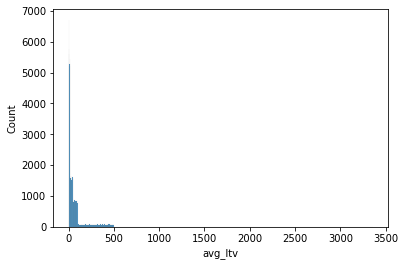

In [26]:
sns.histplot(result_df['avg_ltv'])

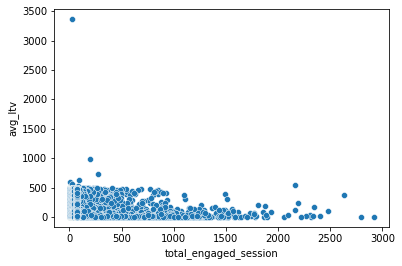

In [27]:
sns.scatterplot(data = result_df[result_df['total_engaged_session'] > 0], x = 'total_engaged_session', y = 'avg_ltv')

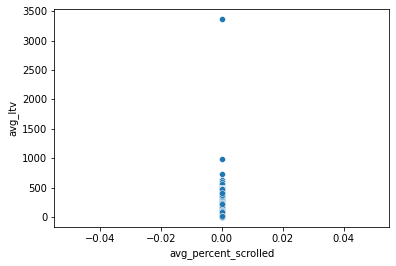

In [28]:
sns.scatterplot(data = result_df, x = 'avg_percent_scrolled', y = 'avg_ltv')

In [29]:
# let's check if the user is having only one ltv for every distinct pseudo_user_id
# since our target variable is customer LTV, let's us check it's distribution
query = f'''
SELECT
user_pseudo_id,
COUNT(DISTINCT ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY user_pseudo_id
HAVING COUNT(DISTINCT ltv) > 1
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df.head()

,user_pseudo_id,avg_ltv


In [30]:
# Let's see the distribution of different events based on event_name

query = f'''
SELECT event_name,
COUNT(DISTINCT user_pseudo_id) as user_count
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY event_name
ORDER BY user_count
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df.head()

,event_name,user_count
0,view_item_list,37
1,click,919
2,purchase,3998
3,add_payment_info,5193
4,select_promotion,7371


In [31]:
# let's visualize the distribution
fig = px.bar(res_df, x="user_count", y="event_name",  title="Event Name Frequency Distribution")
fig.show()

In [32]:
# let's see the customer's geographical distribution and how that affects the ltv
query = f'''
SELECT geo.country,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY geo.country
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df.head()

,country,row_count,avg_ltv
0,Kosovo,406,25.700624
1,Trinidad & Tobago,441,71.357914
2,Honduras,509,56.562099
3,Ghana,606,88.525287
4,Oman,673,68.575556


In [33]:
# let's visualize the distribution
fig = px.bar(res_df, x="avg_ltv", y="country",  title="Event Name LTV Distribution")
fig.show()

In [34]:
query = f'''
SELECT geo.sub_continent,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY geo.sub_continent
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df

,sub_continent,row_count,avg_ltv
0,Middle Africa,903,115.279526
1,Central Asia,2966,45.434722
2,Eastern Africa,5556,88.392963
3,Southern Africa,6180,42.808083
4,Western Africa,7081,70.098073
5,Caribbean,9746,46.619522
6,(not set),9939,49.630279
7,Northern Africa,18898,63.328588
8,Australasia,40860,60.685651
9,Central America,43060,57.023151


In [35]:
# let's visualize the distribution
fig = px.bar(res_df, x="avg_ltv", y="sub_continent",  title="Event Name LTV Distribution")
fig.show()

#### Insight - Average LTV seems to vary across different sub_continents and countries. So, let's use these features to predict LTV.

In [36]:
query = f'''
SELECT geo.continent,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY geo.continent
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df.head()

,continent,row_count,avg_ltv
0,(not set),9939,49.630279
1,Africa,38618,66.106758
2,Oceania,40860,60.685651
3,Europe,717119,59.602859
4,Asia,893966,59.537232


In [37]:
# let's see how ltv varies for different marketing campaigns
query = f'''
SELECT traffic_source.name,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY traffic_source.name
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df

,name,row_count,avg_ltv
0,(data deleted),275194,52.891831
1,(referral),701498,58.338870
2,<Other>,702015,60.196650
3,(direct),886766,59.753636
4,(organic),1294290,59.246487


In [38]:
query = f'''
SELECT traffic_source.medium,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY traffic_source.medium
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df

,medium,row_count,avg_ltv
0,cpc,157357,61.071035
1,(data deleted),282383,52.856160
2,<Other>,537459,60.057824
3,referral,701508,58.338340
4,(none),886766,59.753636
5,organic,1294290,59.246487


In [39]:
query = f'''
SELECT traffic_source.source,
COUNT(*) as row_count,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`
GROUP BY traffic_source.source
ORDER BY row_count, avg_ltv
'''

query_job = client.query(query)
res_df = query_job.to_dataframe()
res_df

,source,row_count,avg_ltv
0,(data deleted),277663,52.864848
1,shop.googlemerchandisestore.com,328410,56.060356
2,(direct),886766,59.753636
3,<Other>,1017982,60.268175
4,google,1348942,59.290831


In [40]:
# let's see for how the ltv differs with no of purchases made
query = f'''
SELECT user_pseudo_id,
DATE_DIFF(PARSE_DATE('%Y%m%d', MAX(event_date)), PARSE_DATE('%Y%m%d', MIN(event_date)), DAY) day_diff,
SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'affiliate' THEN 1 ELSE 0 END) AS total_affiliate,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'referral' THEN 1 ELSE 0 END) AS total_referral,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'email' THEN 1 ELSE 0 END) AS total_email,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value = '(data deleted)' THEN 1 ELSE 0 END) AS is_delete,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('(none)', '<Other>') THEN 1 ELSE 0 END) AS is_other,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('organic', 'cpc') THEN 1 ELSE 0 END) AS total_organics,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'Data Share Promo' THEN 1 ELSE 0 END) AS no_data_share_campaign,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = '(direct)' THEN 1 ELSE 0 END) AS no_of_direct_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V1' THEN 1 ELSE 0 END) AS is_new_year_campaign1, 
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V2' THEN 1 ELSE 0 END) AS is_new_year_campaign2,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('Holiday_V1', 'Holiday_V2') THEN 1 ELSE 0 END) AS total_holiday_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('BlackFriday_V1', 'BlackFriday_V2') THEN 1 ELSE 0 END) AS is_black_friday_campaign,
MAX(CASE WHEN ep.key = 'payment_type' AND ep.value.string_value IS NOT NULL THEN 1 ELSE 0 END) AS payment_by_cc,
MAX(CASE WHEN ep.key = 'promotion_name' THEN ep.value.string_value ELSE '0' END) AS promotion_name,
SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) as no_of_purchase,
SUM(CASE WHEN ecommerce.purchase_revenue_in_usd IS NULL THEN 0 ELSE ecommerce.purchase_revenue_in_usd END) as total_purchase_value,
SUM(CASE WHEN ecommerce.unique_items IS NULL THEN 0 ELSE ecommerce.unique_items END) as total_unique_items,
SUM(CASE WHEN ecommerce.total_item_quantity IS NULL THEN 0 ELSE ecommerce.total_item_quantity END) as total_item_quantity,
SUM(CASE WHEN ecommerce.transaction_id IS NULL THEN 0 ELSE 1 END) as total_transactions,
MAX(CASE WHEN device.category = 'mobile' THEN 1 ELSE 0 END) as is_mobile,
MAX(device.operating_system) as os,
MAX(device.web_info.browser) as browser,
MAX(traffic_source.name) as first_campaign,
MAX(traffic_source.medium) as first_medium,
MAX(traffic_source.source) as first_network,
SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) as no_of_page_view,
SUM(CASE WHEN event_name = 'session_start' THEN 1 ELSE 0 END) as no_of_sessions,
SUM(CASE WHEN event_name = 'add_to_cart' THEN 1 ELSE 0 END) as no_of_add_cart,
SUM(CASE WHEN event_name = 'scroll' THEN 1 ELSE 0 END) as no_of_scroll,
MAX(CASE WHEN event_name = 'add_shipping_info' THEN 1 ELSE 0 END) as has_added_address,
SUM(CASE WHEN event_name = 'select_promotion' THEN 1 ELSE 0 END) as no_of_select_promotion,
MAX(CASE WHEN event_name = 'add_payment_info' THEN 1 ELSE 0 END) as has_added_payment,
CASE WHEN SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_view_ratio,
CASE WHEN SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_page_view_ratio,
MAX(geo.country) as country,
MAX(geo.sub_continent) as sub_continent,
MAX(geo.continent) as continent,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`,
  UNNEST (event_params) AS ep
GROUP BY user_pseudo_id
'''

# print(query)
query_job = client.query(query)
result_df = query_job.to_dataframe()


In [41]:
result_df.head()

,user_pseudo_id,day_diff,total_engaged_session,avg_engagement_in_mins,total_affiliate,total_referral,total_email,is_delete,is_other,total_organics,no_data_share_campaign,no_of_direct_campaign,is_new_year_campaign1,is_new_year_campaign2,total_holiday_campaign,is_black_friday_campaign,payment_by_cc,promotion_name,no_of_purchase,total_purchase_value,total_unique_items,total_item_quantity,total_transactions,is_mobile,os,browser,first_campaign,first_medium,first_network,no_of_page_view,no_of_sessions,no_of_add_cart,no_of_scroll,has_added_address,no_of_select_promotion,has_added_payment,purchase_to_view_ratio,purchase_to_page_view_ratio,country,sub_continent,continent,avg_ltv
0,8548294404.1263177353,0,7,950.296610,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,21,0,21,0,Web,Chrome,(referral),referral,<Other>,33,5,0,15,0,0,0,0.0,0.0,United States,Northern America,Americas,2.912032
1,5309380.5065163272,0,2,18.673913,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,9,0,9,1,Web,Safari,(organic),organic,google,24,6,0,0,0,0,0,0.0,0.0,United States,Northern America,Americas,25.155186
2,3420988.6904875849,0,6,365.879032,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,150,0,24,1,Web,Safari,(direct),(none),(direct),36,5,0,15,0,0,0,0.0,0.0,United States,Northern America,Americas,12.045227
3,73943244.2227360476,4,2,73.135417,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0.0,10,0,10,0,<Other>,Chrome,<Other>,organic,google,25,11,0,16,0,0,0,0.0,0.0,United States,Northern America,Americas,69.527352
4,43293650.3883897464,0,2,248.397059,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10,0,10,1,Android,Chrome,(referral),referral,<Other>,23,5,0,0,0,0,0,0.0,0.0,United States,Northern America,Americas,96.130231


In [42]:
result_df.shape

(243394, 42)

In [43]:
result_df.nunique()

user_pseudo_id                 243394
day_diff                           91
total_engaged_session             570
avg_engagement_in_mins         194988
total_affiliate                    13
total_referral                    250
total_email                         9
is_delete                           2
is_other                            2
total_organics                    144
no_data_share_campaign             13
no_of_direct_campaign             127
is_new_year_campaign1               2
is_new_year_campaign2               2
total_holiday_campaign              6
is_black_friday_campaign            2
payment_by_cc                       2
promotion_name                      5
no_of_purchase                    103
total_purchase_value             1201
total_unique_items               4938
total_item_quantity              1183
total_transactions               1362
is_mobile                           2
os                                  6
browser                             6
first_campai

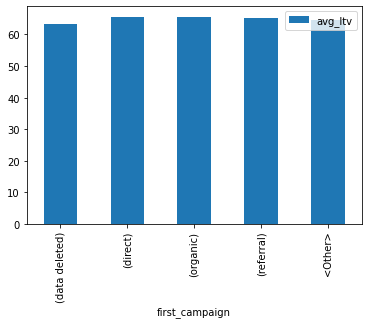

In [44]:
result_df.groupby('first_campaign').agg({'avg_ltv' : 'mean'}).plot(kind='bar')

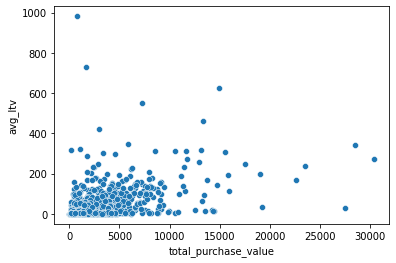

In [45]:
sns.scatterplot(data = result_df[result_df['total_purchase_value'] > 0], x = 'total_purchase_value', y = 'avg_ltv')

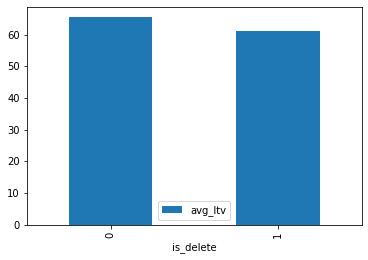

In [46]:
result_df.groupby('is_delete').agg({'avg_ltv' : 'mean'}).plot(kind='bar')

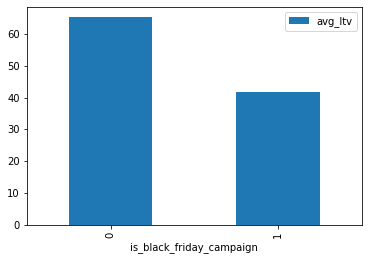

In [47]:
result_df.groupby('is_black_friday_campaign').agg({'avg_ltv' : 'mean'}).plot(kind='bar')

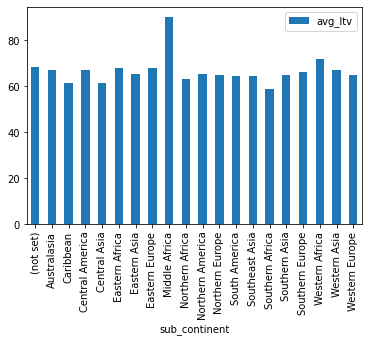

In [48]:
result_df.groupby('sub_continent').agg({'avg_ltv' : 'mean'}).plot(kind='bar')

### Feature Engineering

In [49]:
# You can create the dataset through code.
DATASET_NAME = "ga4_ecomm_feature_set"

try:
  dataset = client.create_dataset(DATASET_NAME, timeout=30)  # Make an API request.
  print("Created dataset {}.{}".format(client.project, dataset.dataset_id))
except Exception as e:
  print(e)

409 POST https://bigquery.googleapis.com/bigquery/v2/projects/wide-ratio-375614/datasets?prettyPrint=false: Already Exists: Dataset wide-ratio-375614:ga4_ecomm_feature_set


In [50]:
feature_table="ga4_features_train" #table name

In [51]:
query = f"""
CREATE OR REPLACE TABLE
  `{DATASET_NAME}.{feature_table}` AS
SELECT user_pseudo_id,
DATE_DIFF(PARSE_DATE('%Y%m%d', MAX(event_date)), PARSE_DATE('%Y%m%d', MIN(event_date)), DAY) day_diff,
SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'affiliate' THEN 1 ELSE 0 END) AS total_affiliate,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'referral' THEN 1 ELSE 0 END) AS total_referral,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'email' THEN 1 ELSE 0 END) AS total_email,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value = '(data deleted)' THEN 1 ELSE 0 END) AS is_delete,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('(none)', '<Other>') THEN 1 ELSE 0 END) AS is_other,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('organic', 'cpc') THEN 1 ELSE 0 END) AS total_organics,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'Data Share Promo' THEN 1 ELSE 0 END) AS no_data_share_campaign,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = '(direct)' THEN 1 ELSE 0 END) AS no_of_direct_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V1' THEN 1 ELSE 0 END) AS is_new_year_campaign1, 
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V2' THEN 1 ELSE 0 END) AS is_new_year_campaign2,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('Holiday_V1', 'Holiday_V2') THEN 1 ELSE 0 END) AS total_holiday_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('BlackFriday_V1', 'BlackFriday_V2') THEN 1 ELSE 0 END) AS is_black_friday_campaign,
MAX(CASE WHEN ep.key = 'payment_type' AND ep.value.string_value IS NOT NULL THEN 1 ELSE 0 END) AS payment_by_cc,
MAX(CASE WHEN ep.key = 'promotion_name' THEN ep.value.string_value ELSE '0' END) AS promotion_name,
SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) as no_of_purchase,
SUM(CASE WHEN ecommerce.purchase_revenue_in_usd IS NULL THEN 0 ELSE ecommerce.purchase_revenue_in_usd END) as total_purchase_value,
SUM(CASE WHEN ecommerce.unique_items IS NULL THEN 0 ELSE ecommerce.unique_items END) as total_unique_items,
SUM(CASE WHEN ecommerce.total_item_quantity IS NULL THEN 0 ELSE ecommerce.total_item_quantity END) as total_item_quantity,
SUM(CASE WHEN ecommerce.transaction_id IS NULL THEN 0 ELSE 1 END) as total_transactions,
MAX(CASE WHEN device.category = 'mobile' THEN 1 ELSE 0 END) as is_mobile,
MAX(device.operating_system) as os,
MAX(device.web_info.browser) as browser,
MAX(traffic_source.name) as first_campaign,
MAX(traffic_source.medium) as first_medium,
MAX(traffic_source.source) as first_network,
SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) as no_of_page_view,
SUM(CASE WHEN event_name = 'session_start' THEN 1 ELSE 0 END) as no_of_sessions,
SUM(CASE WHEN event_name = 'add_to_cart' THEN 1 ELSE 0 END) as no_of_add_cart,
SUM(CASE WHEN event_name = 'scroll' THEN 1 ELSE 0 END) as no_of_scroll,
MAX(CASE WHEN event_name = 'add_shipping_info' THEN 1 ELSE 0 END) as has_added_address,
SUM(CASE WHEN event_name = 'select_promotion' THEN 1 ELSE 0 END) as no_of_select_promotion,
MAX(CASE WHEN event_name = 'add_payment_info' THEN 1 ELSE 0 END) as has_added_payment,
CASE WHEN SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_view_ratio,
CASE WHEN SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_page_view_ratio,
MAX(geo.country) as country,
MAX(geo.sub_continent) as sub_continent,
MAX(geo.continent) as continent,
AVG(ltv) as avg_ltv
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TRAIN}`,
  UNNEST (event_params) AS ep
GROUP BY user_pseudo_id
  """

print(query)
# query_job = client.query(query) 
# run in bq


CREATE OR REPLACE TABLE
  `ga4_ecomm_feature_set.ga4_features_train` AS
SELECT user_pseudo_id,
DATE_DIFF(PARSE_DATE('%Y%m%d', MAX(event_date)), PARSE_DATE('%Y%m%d', MIN(event_date)), DAY) day_diff,
SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'affiliate' THEN 1 ELSE 0 END) AS total_affiliate,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'referral' THEN 1 ELSE 0 END) AS total_referral,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'email' THEN 1 ELSE 0 END) AS total_email,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value = '(data deleted)' THEN 1 ELSE 0 END) AS is_delete,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('(none)', '<Other>') THEN 1 ELS

In [52]:
query = """

SELECT
  *
FROM
  `ga4_ecomm_feature_set.ga4_features_train`
LIMIT
5
"""

query_job = client.query(query)
result_df = query_job.to_dataframe()
result_df.head()

,user_pseudo_id,day_diff,total_engaged_session,avg_engagement_in_mins,total_affiliate,total_referral,total_email,is_delete,is_other,total_organics,no_data_share_campaign,no_of_direct_campaign,is_new_year_campaign1,is_new_year_campaign2,total_holiday_campaign,is_black_friday_campaign,payment_by_cc,promotion_name,no_of_purchase,total_purchase_value,total_unique_items,total_item_quantity,total_transactions,is_mobile,os,browser,first_campaign,first_medium,first_network,no_of_page_view,no_of_sessions,no_of_add_cart,no_of_scroll,has_added_address,no_of_select_promotion,has_added_payment,purchase_to_view_ratio,purchase_to_page_view_ratio,country,sub_continent,continent,avg_ltv
0,98762712.2401470052,0,1,541.809524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,Macintosh,Chrome,<Other>,cpc,google,0,0,0,11,0,0,0,0.0,0.0,United States,Northern America,Americas,372.342267
1,7787197.9085371765,0,2,860.714286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,Android,Chrome,<Other>,cpc,google,0,0,0,11,0,0,0,0.0,0.0,Indonesia,Southeast Asia,Asia,12.488749
2,87343596.4654266593,0,0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,Web,Chrome,<Other>,cpc,google,0,5,0,0,0,0,0,0.0,0.0,India,Southern Asia,Asia,26.346100
3,69569805.2949965984,0,0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,14,1,Web,Chrome,<Other>,cpc,google,0,6,0,0,0,0,0,0.0,0.0,Greece,Southern Europe,Europe,5.148061
4,52631209.7398351370,0,1,625.523810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,Web,Chrome,<Other>,cpc,google,0,0,0,11,0,0,0,0.0,0.0,Turkey,Western Asia,Asia,9.827781


In [53]:
model_name = "customer_ltv_model_xgb"


xgb_query = f"""
CREATE OR REPLACE MODEL
  `{DATASET_NAME}.{model_name}` 
  OPTIONS (
      MODEL_TYPE =  'BOOSTED_TREE_REGRESSOR',
      LEARN_RATE = 0.08,
      BOOSTER_TYPE = 'GBTREE',
      COLSAMPLE_BYTREE = 0.6,
      SUBSAMPLE = 0.8,
      MAX_TREE_DEPTH = 7,
      INPUT_LABEL_COLS = ['avg_ltv']
   ) 
AS
SELECT
  * except (user_pseudo_id)
FROM
  `{PROJECT_ID}.{DATASET_NAME}.{feature_table}`
WHERE
  avg_ltv IS NOT NULL
"""
print(xgb_query)
# query_job = client.query(xgb_query)
#RUN THIS ON BQ CONSOLE 


CREATE OR REPLACE MODEL
  `ga4_ecomm_feature_set.customer_ltv_model_xgb` 
  OPTIONS (
      MODEL_TYPE =  'BOOSTED_TREE_REGRESSOR',
      LEARN_RATE = 0.08,
      BOOSTER_TYPE = 'GBTREE',
      COLSAMPLE_BYTREE = 0.6,
      SUBSAMPLE = 0.8,
      MAX_TREE_DEPTH = 7,
      INPUT_LABEL_COLS = ['avg_ltv']
   ) 
AS
SELECT
  * except (user_pseudo_id)
FROM
  `wide-ratio-375614.ga4_ecomm_feature_set.ga4_features_train`
WHERE
  avg_ltv IS NOT NULL



In [54]:
ml_evaluate_query = f"""
SELECT
  *
FROM
  ML.EVALUATE(MODEL `{PROJECT_ID}.{DATASET_NAME}.{model_name}`,
    (
    SELECT
      *
    FROM
      `{PROJECT_ID}.{DATASET_NAME}.{feature_table}`
    WHERE
      avg_ltv IS NOT NULL))
"""
query_job = client.query(ml_evaluate_query)
ml_info_df = query_job.to_dataframe()
ml_info_df

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,54.734854,12290.146223,1.765605,19.669217,-0.136205,0.00472


### Prediction

In [55]:
# Creating features from test set 
feature_table_test ="ga4_features_test" #table name

query = f"""
CREATE OR REPLACE TABLE
  `{DATASET_NAME}.{feature_table_test}` AS
SELECT user_pseudo_id,
DATE_DIFF(PARSE_DATE('%Y%m%d', MAX(event_date)), PARSE_DATE('%Y%m%d', MIN(event_date)), DAY) day_diff,
SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'affiliate' THEN 1 ELSE 0 END) AS total_affiliate,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'referral' THEN 1 ELSE 0 END) AS total_referral,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'email' THEN 1 ELSE 0 END) AS total_email,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value = '(data deleted)' THEN 1 ELSE 0 END) AS is_delete,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('(none)', '<Other>') THEN 1 ELSE 0 END) AS is_other,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('organic', 'cpc') THEN 1 ELSE 0 END) AS total_organics,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'Data Share Promo' THEN 1 ELSE 0 END) AS no_data_share_campaign,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = '(direct)' THEN 1 ELSE 0 END) AS no_of_direct_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V1' THEN 1 ELSE 0 END) AS is_new_year_campaign1, 
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value = 'NewYear_V2' THEN 1 ELSE 0 END) AS is_new_year_campaign2,
SUM(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('Holiday_V1', 'Holiday_V2') THEN 1 ELSE 0 END) AS total_holiday_campaign,
MAX(CASE WHEN ep.key = 'campaign' AND ep.value.string_value IN ('BlackFriday_V1', 'BlackFriday_V2') THEN 1 ELSE 0 END) AS is_black_friday_campaign,
MAX(CASE WHEN ep.key = 'payment_type' AND ep.value.string_value IS NOT NULL THEN 1 ELSE 0 END) AS payment_by_cc,
MAX(CASE WHEN ep.key = 'promotion_name' THEN ep.value.string_value ELSE '0' END) AS promotion_name,
SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) as no_of_purchase,
SUM(CASE WHEN ecommerce.purchase_revenue_in_usd IS NULL THEN 0 ELSE ecommerce.purchase_revenue_in_usd END) as total_purchase_value,
SUM(CASE WHEN ecommerce.unique_items IS NULL THEN 0 ELSE ecommerce.unique_items END) as total_unique_items,
SUM(CASE WHEN ecommerce.total_item_quantity IS NULL THEN 0 ELSE ecommerce.total_item_quantity END) as total_item_quantity,
SUM(CASE WHEN ecommerce.transaction_id IS NULL THEN 0 ELSE 1 END) as total_transactions,
MAX(CASE WHEN device.category = 'mobile' THEN 1 ELSE 0 END) as is_mobile,
MAX(device.operating_system) as os,
MAX(device.web_info.browser) as browser,
MAX(traffic_source.name) as first_campaign,
MAX(traffic_source.medium) as first_medium,
MAX(traffic_source.source) as first_network,
SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) as no_of_page_view,
SUM(CASE WHEN event_name = 'session_start' THEN 1 ELSE 0 END) as no_of_sessions,
SUM(CASE WHEN event_name = 'add_to_cart' THEN 1 ELSE 0 END) as no_of_add_cart,
SUM(CASE WHEN event_name = 'scroll' THEN 1 ELSE 0 END) as no_of_scroll,
MAX(CASE WHEN event_name = 'add_shipping_info' THEN 1 ELSE 0 END) as has_added_address,
SUM(CASE WHEN event_name = 'select_promotion' THEN 1 ELSE 0 END) as no_of_select_promotion,
MAX(CASE WHEN event_name = 'add_payment_info' THEN 1 ELSE 0 END) as has_added_payment,
CASE WHEN SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_view_ratio,
CASE WHEN SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) > 0
THEN (SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) / SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END)) 
ELSE 0 END AS purchase_to_page_view_ratio,
MAX(geo.country) as country,
MAX(geo.sub_continent) as sub_continent,
MAX(geo.continent) as continent
FROM `{PROJECT_ID_DATA}.{DATASET_ID_DATA}.{TABLE_ID_TEST}`,
  UNNEST (event_params) AS ep
GROUP BY user_pseudo_id
  """
print(query)
# query_job = client.query(query)
# run in bq


CREATE OR REPLACE TABLE
  `ga4_ecomm_feature_set.ga4_features_test` AS
SELECT user_pseudo_id,
DATE_DIFF(PARSE_DATE('%Y%m%d', MAX(event_date)), PARSE_DATE('%Y%m%d', MIN(event_date)), DAY) day_diff,
SUM(CASE WHEN ep.key = 'session_engaged' AND ep.value.string_value = '1' THEN 1 ELSE 0 END) as total_engaged_session,
AVG(CASE WHEN ep.key = 'engagement_time_msec' AND (ep.value.int_value * 00001667) IS NOT NULL THEN ep.value.int_value ELSE 0 END) as avg_engagement_in_mins,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'affiliate' THEN 1 ELSE 0 END) AS total_affiliate,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'referral' THEN 1 ELSE 0 END) AS total_referral,
SUM(CASE WHEN ep.key = 'medium' AND ep.value.string_value = 'email' THEN 1 ELSE 0 END) AS total_email,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value = '(data deleted)' THEN 1 ELSE 0 END) AS is_delete,
MAX(CASE WHEN ep.key = 'medium' AND ep.value.string_value IN ('(none)', '<Other>') THEN 1 ELSE

In [56]:
query = """

SELECT
  *
FROM
  `ga4_ecomm_feature_set.ga4_features_test`
LIMIT
5
"""

query_job = client.query(query)
result_df = query_job.to_dataframe()
result_df.head()

,user_pseudo_id,day_diff,total_engaged_session,avg_engagement_in_mins,total_affiliate,total_referral,total_email,is_delete,is_other,total_organics,no_data_share_campaign,no_of_direct_campaign,is_new_year_campaign1,is_new_year_campaign2,total_holiday_campaign,is_black_friday_campaign,payment_by_cc,promotion_name,no_of_purchase,total_purchase_value,total_unique_items,total_item_quantity,total_transactions,is_mobile,os,browser,first_campaign,first_medium,first_network,no_of_page_view,no_of_sessions,no_of_add_cart,no_of_scroll,has_added_address,no_of_select_promotion,has_added_payment,purchase_to_view_ratio,purchase_to_page_view_ratio,country,sub_continent,continent
0,1106844.3789913643,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,Web,Safari,(direct),(none),(direct),0,5,0,0,0,0,0,0.0,0.0,United States,Northern America,Americas
1,22406368.7335363784,0,0,911.555556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,iOS,Safari,(direct),(none),(direct),0,0,0,0,0,0,0,0.0,0.0,Germany,Western Europe,Europe
2,5582500.3168433253,0,0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0,0,0,1,Web,Chrome,(direct),(none),(direct),0,5,0,0,0,0,0,0.0,0.0,Netherlands,Western Europe,Europe
3,2314869.6702541888,0,0,153.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10,0,10,1,Android,Chrome,(direct),(none),(direct),0,0,0,0,0,0,0,0.0,0.0,United States,Northern America,Americas
4,7031008.4333209145,0,0,381.380952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,Web,Chrome,(direct),(none),(direct),0,4,0,0,0,0,0,0.0,0.0,United States,Northern America,Americas


In [57]:
prediction_data_table_name = "model_prediction_ltv_test"
query = f"""
CREATE OR REPLACE TABLE
  {DATASET_NAME}.{prediction_data_table_name} AS
SELECT
  *
FROM
  ML.PREDICT(MODEL `{DATASET_NAME}.{model_name}`,
    (
    SELECT
      *
    FROM
      `{PROJECT_ID}.{DATASET_NAME}.ga4_features_test`
    ))
"""
# print(query)
query_job = client.query(query)

In [58]:
query = f"""
SELECT
  *
FROM
  {PROJECT_ID}.{DATASET_NAME}.{prediction_data_table_name}
LIMIT 5
"""
# print(query)
query_job = client.query(query)
predict_data = query_job.to_dataframe()
predict_data.head()

,predicted_avg_ltv,user_pseudo_id,day_diff,total_engaged_session,avg_engagement_in_mins,total_affiliate,total_referral,total_email,is_delete,is_other,total_organics,no_data_share_campaign,no_of_direct_campaign,is_new_year_campaign1,is_new_year_campaign2,total_holiday_campaign,is_black_friday_campaign,payment_by_cc,promotion_name,no_of_purchase,total_purchase_value,total_unique_items,total_item_quantity,total_transactions,is_mobile,os,browser,first_campaign,first_medium,first_network,no_of_page_view,no_of_sessions,no_of_add_cart,no_of_scroll,has_added_address,no_of_select_promotion,has_added_payment,purchase_to_view_ratio,purchase_to_page_view_ratio,country,sub_continent,continent
0,26.125,1197413.7471591614,0,0,16.116279,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,15,0,15,0,Web,Chrome,<Other>,cpc,google,15,6,0,0,0,0,0,0.0,0.0,Italy,Southern Europe,Europe
1,26.125,427659234.2261690901,0,0,52.212766,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,Android,Chrome,<Other>,cpc,google,17,6,0,0,0,0,0,0.0,0.0,Italy,Southern Europe,Europe
2,26.125,1957519.3084981020,0,0,44.976744,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,Web,Chrome,<Other>,cpc,google,15,6,0,0,0,0,0,0.0,0.0,Germany,Western Europe,Europe
3,26.125,79167808.2908281029,0,0,63.636364,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,Web,Chrome,<Other>,cpc,google,15,6,0,16,0,0,0,0.0,0.0,Switzerland,Western Europe,Europe
4,26.125,5194408.5119368294,0,0,3.348837,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0,0,15,1,Android,Chrome,<Other>,cpc,google,15,6,0,0,0,0,0,0.0,0.0,Netherlands,Western Europe,Europe


In [59]:
query = f"""
SELECT
  user_pseudo_id,predicted_avg_ltv
FROM
  {PROJECT_ID}.{DATASET_NAME}.{prediction_data_table_name}
"""
# print(query)
query_job = client.query(query)
submission_data = query_job.to_dataframe()
submission_data.head()

,user_pseudo_id,predicted_avg_ltv
0,1197413.7471591614,26.125
1,427659234.2261690901,26.125
2,1957519.3084981020,26.125
3,79167808.2908281029,26.125
4,5194408.5119368294,26.125


In [60]:
## Create Submission 
submission = submission_data[['user_pseudo_id',"predicted_avg_ltv"]]
#make sure before submission that your shape is (26760, 2). Do not submit unless its of same shape. 
submission.shape

(26760, 2)

In [61]:
#check for negative ltv
submission[submission['predicted_avg_ltv'] < 0].shape

(0, 2)

In [63]:
submission.to_csv("submission_7.csv",index=False)